# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [35]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [36]:
# Import essential libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
import keras
import sklearn
import zipfile
import os
import warnings 

warnings.filterwarnings('ignore')

# Pandas by default doesn't display all the columns in the dataframe
# As we're going to work on a large dataset, the following setting will help read data from all the columns
pd.set_option('display.max_columns', None)

# Disable scientific notation
pd.options.display.float_format = '{:,.2f}'.format

# For some of the columns we may have to see the data from all rows
# Eg: Categorical columns.
pd.set_option('display.max_rows', None)

# Set themes, styles and color palette for seaborn charts
sns.set_theme(style='darkgrid', context='poster')
sns.set_palette(palette='pastel', n_colors=10)

plt.rcParams["figure.figsize"] = (12, 4)
plt.rcParams["axes.titlesize"] = 14 
plt.rcParams["axes.labelsize"] = 12 
plt.rcParams["xtick.labelsize"] = 10 
plt.rcParams["ytick.labelsize"] = 10 

# Print version numbers
print('Numpy version:      ' + np.__version__)
print('Pandas version:     ' + pd.__version__)
print('Seaborn version:    ' + sns.__version__)
print('Matplotlib version: ' + matplotlib.__version__)
print('PIL version:        ' + Image.__version__)
print('TensorFlow version: ' + tf.__version__)
print('Keras version:      ' + keras.__version__)
print('Scikit-learn version: ' + sklearn.__version__)

Numpy version:      1.26.4
Pandas version:     2.2.2
Seaborn version:    0.13.2
Matplotlib version: 3.9.2
PIL version:        10.4.0
TensorFlow version: 2.18.1
Keras version:      3.9.2
Scikit-learn version: 1.5.1


Load the dataset.

In [37]:
# Load and unzip the dataset

# The data.zip is loaded from https://drive.google.com/drive/folders/1sajIcvGxBemqK_YIHFoY28EyV1Su_b5M?usp=drive_link
zip_path = 'data.zip' 
extract_folder = 'waste_dataset' 

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print(f"Dataset extracted to '{extract_folder}'")

Dataset extracted to 'waste_dataset'


## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [38]:
# Create a function to load the raw images
def load_images(folder_name, target_size=(64, 64)):
    images = []
    labels = []
    sub_folder_names = os.listdir(folder_name)

    for sub_folder_name in sub_folder_names:
        sub_folder_path = os.path.join(folder_name, sub_folder_name)

        file_names = os.listdir(sub_folder_path)

        for file_name in filter(lambda k: '.png' in k, file_names):
            file_path = os.path.join(sub_folder_path, file_name)

            try:
                file = Image.open(file_path).convert(mode='RGB')
                file = file.resize(target_size)

                normalized_image_array = np.array(file) / 255.0
                
                images.append(normalized_image_array)
                labels.append(sub_folder_name)
            except Exception as ex:
                print(f"Error loading image {file_path}: {ex}")
    
    return np.array(images), np.array(labels)


#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [39]:
# Get the images and their labels
extract_folder_data = os.path.join(extract_folder, 'data')

X, y = load_images(extract_folder_data)

In [40]:
print(f"Number of images loaded: {len(X)}")
print(f"Number of labels: {len(y)}")
print(f"Unique labels: {np.unique(y)}")

# Quick Observation
# ------------------------
# 1. There are 7625 images loaded and 7 unique labels
# ------------------------

Number of images loaded: 7625
Number of labels: 7625
Unique labels: ['Cardboard' 'Food_Waste' 'Glass' 'Metal' 'Other' 'Paper' 'Plastic']


Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

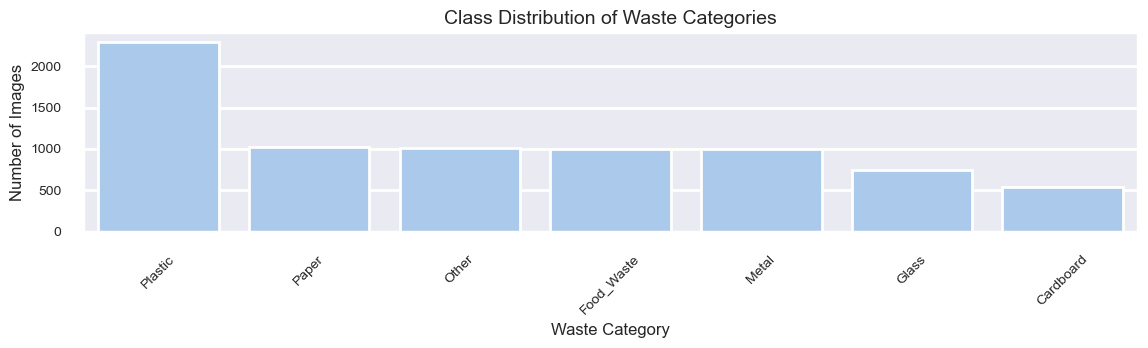

In [41]:
# Visualise Data Distribution
label_counts = pd.Series(y).value_counts()

sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Class Distribution of Waste Categories')
plt.xlabel('Waste Category')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

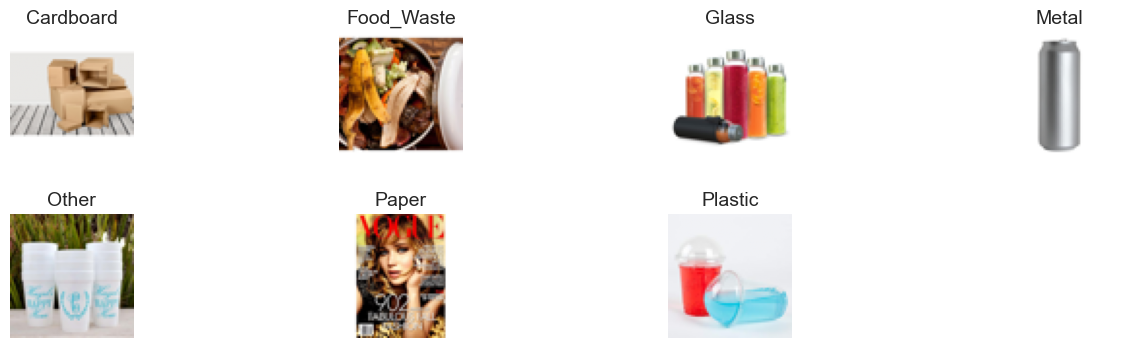

In [42]:
# Visualise Sample Images (across different labels)
import random

combined_data = list(zip(X, y))
unique_labels = np.unique(y)
sample_images = [random.choice([img for img, label in combined_data if label == l]) for l in unique_labels]

plt.figure(figsize=(14, 4))

for i, img in enumerate(sample_images):
    plt.subplot(2, (len(sample_images) + 1) // 2, i + 1)
    plt.imshow(img)
    plt.title(unique_labels[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [43]:
# Find the smallest and largest image dimensions from the data set

# 1. I have already resized and normalized the images. Hence showing the image size of hte sample imageset.

for label, img in zip(unique_labels, sample_images):
    h, w = img.shape[:2]
    print(f"Label: {label}, Height: {h}, Width: {w}")

# Quick Observation
# ------------------------
# 1. The height and width of the images are 64.
#    As you can notice hte signature of function load_images(folder_name, target_size=(64, 64)).
#    The attribute target_size is defaulted to 64, 64
#    Hence the images are resized before being loaded into the collection.
# ------------------------

Label: Cardboard, Height: 64, Width: 64
Label: Food_Waste, Height: 64, Width: 64
Label: Glass, Height: 64, Width: 64
Label: Metal, Height: 64, Width: 64
Label: Other, Height: 64, Width: 64
Label: Paper, Height: 64, Width: 64
Label: Plastic, Height: 64, Width: 64


### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [44]:
# Encode the labels suitably
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

encoded_labels = label_encoder.fit_transform(y)

print("Label classes:", label_encoder.classes_)
print("Encoded collection:", encoded_labels)
print("Actual collection:", y)

Label classes: ['Cardboard' 'Food_Waste' 'Glass' 'Metal' 'Other' 'Paper' 'Plastic']
Encoded collection: [0 0 0 ... 6 6 6]
Actual collection: ['Cardboard' 'Cardboard' 'Cardboard' ... 'Plastic' 'Plastic' 'Plastic']


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [45]:
# Assign specified parts of the dataset to train and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, stratify=y, random_state=100)

print(f"Image collection training set: {X_train.shape}")
print(f"Image collection validation set: {X_val.shape}")

print(f"Image labels training set: {y_train.shape}")
print(f"Image labels validation set: {y_val.shape}")

Image collection training set: (5337, 64, 64, 3)
Image collection validation set: (2288, 64, 64, 3)
Image labels training set: (5337,)
Image labels validation set: (2288,)


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [46]:
# Build and compile the model

# We'll use sequential type of model. In this neural layers are added in a linear stack, one after the other
# In our case we'll have an input layer, 3 convolutional layers and an output layer
from tensorflow.keras.models import Sequential

# Conv2D is used for applying filters and detecting patterns
# MaxPooling2D is used to impliment the pooling concept ie., get a 2 x 2 region and get the max value
# Flatten is used to convert 2D feature maps to single dimension array, which can be fed into dense layers. 6 x 6 pixel image to an array of len 36
# Dense takes the flatten input from each neuron, applies and activation function and outputs probabilities for each class.
# Dropout drops a fraction of the neurons during training, helps prevent overfitting.
# BatchNormalization helps in speeding up learning
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input)

In [47]:
input_shape = sample_images[0].shape
num_classes = len(unique_labels)

# Reference: https://keras.io/api/models/sequential/
# Sequential will group a linear stack of layers into a model. We can add multiple layers to the stack, one at a time.
model = Sequential()

model.add(Input(shape=input_shape))

In [48]:
# Convolutional layer 1 added to the model
# ----------------------------------------
# Reference: https://keras.io/api/layers/convolution_layers/convolution2d/
# 32 filters in the convolution
# The convolutional window is 3,3
# We'll use relu activation function
# We'll use default stride 1, 1 ie., the filter will move one step at a time. Padding 'same' will add padding on all sides to retain the shape
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))

# Reference: https://keras.io/api/layers/normalization_layers/batch_normalization/
# Batch normalization applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.
model.add(BatchNormalization())

# Reference: https://keras.io/api/layers/pooling_layers/max_pooling2d/
# By doing pooling, the system will go through 2 x 2 matrix and get the max value.
model.add(MaxPooling2D(pool_size=(2, 2)))

# Reference: https://keras.io/api/layers/regularization_layers/dropout/
# Dropout is a regularization technique. In the following code we're turning off 25% of the neurons
model.add(Dropout(0.25))
# ----------------------------------------

In [49]:
# Convolutional layer 2 added to the model
# ----------------------------------------
# The number of filters is increased to 64 for deeper learning than the basic understanding of the image
# Also we're dropping 25% more neurons
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# ----------------------------------------

In [50]:
# Convolutional layer 3 added to the model
# ----------------------------------------
# The number of filters is increased to 128 for deeper learning than the basic understanding of the image
# Also we're dropping 25% more neurons
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# ----------------------------------------

In [51]:
# Fully connected layers
model.add(Flatten())            # <- Add this layer here
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output layer
model.add(Dense(num_classes, activation='softmax'))

In [52]:
# Reference: https://keras.io/api/models/model_training_apis/
# Compile the model
# Because labels are integer encoded, we use the loss function sparse_categorical_crossentropy https://keras.io/api/losses/probabilistic_losses/#sparsecategoricalcrossentropy-class
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [53]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,194,375 (8.37 MB)

 Trainable params: 2,193,415 (8.37 MB)

 Non-trainable params: 960 (3.75 KB)

In [54]:
# Print shape details
print("Layer-by-layer output shapes:\n")
for i, layer in enumerate(model.layers):
    print(layer)
    print(layer.output.shape)

Layer-by-layer output shapes:

<Conv2D name=conv2d_6, built=True>
(None, 64, 64, 32)
<BatchNormalization name=batch_normalization_8, built=True>
(None, 64, 64, 32)
<MaxPooling2D name=max_pooling2d_6, built=True>
(None, 32, 32, 32)
<Dropout name=dropout_8, built=True>
(None, 32, 32, 32)
<Conv2D name=conv2d_7, built=True>
(None, 32, 32, 64)
<BatchNormalization name=batch_normalization_9, built=True>
(None, 32, 32, 64)
<MaxPooling2D name=max_pooling2d_7, built=True>
(None, 16, 16, 64)
<Dropout name=dropout_9, built=True>
(None, 16, 16, 64)
<Conv2D name=conv2d_8, built=True>
(None, 16, 16, 128)
<BatchNormalization name=batch_normalization_10, built=True>
(None, 16, 16, 128)
<MaxPooling2D name=max_pooling2d_8, built=True>
(None, 8, 8, 128)
<Dropout name=dropout_10, built=True>
(None, 8, 8, 128)
<Flatten name=flatten_2, built=True>
(None, 8192)
<Dense name=dense_4, built=True>
(None, 256)
<BatchNormalization name=batch_normalization_11, built=True>
(None, 256)
<Dropout name=dropout_11, built

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [55]:
# Training
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Callback functions used - EarlyStopping and ModelCheckpoint
# Reference: https://keras.io/api/callbacks/early_stopping/
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Reference: https://keras.io/api/callbacks/model_checkpoint/
checkpoint_filepath = '/tmp/ckpt/checkpoint.weights.h5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

# Introducing a new callback funciton after the first observation - ReduceLROnPlateau
# Reference: https://keras.io/api/callbacks/reduce_lr_on_plateau/
reduce_lr_callback = ReduceLROnPlateau(
    monitor='val_loss',    # or 'val_accuracy'
    factor=0.5,            # reduce by half
    patience=2,            # wait 2 epochs before reducing
    min_lr=1e-6,           # don't go below this
    verbose=1              # logs when LR is reduced
)

# Reference: https://keras.io/api/models/model_training_apis/#fit-method
history = model.fit(
    X_train, 
    encoded_labels, 
    batch_size=32, 
    epochs=10, 
    validation_split=0.3,
    callbacks=[early_stopping_callback, model_checkpoint_callback, reduce_lr_callback]
)

# Quick Observations - Iteration 1:
#----------------------------------
# Training Accuracy is imploving by a small margin
# Loss is gradually decreasing
# Validation loss is huge! The training set it overfitting
#
# Epoch 1/10━━━━━━━━━━━━━━━━━━━━ - accuracy: 0.1639 - loss: 2.7129 - val_accuracy: 0.0000e+00 - val_loss: 22.4157
# Epoch 2/10━━━━━━━━━━━━━━━━━━━━ - accuracy: 0.2416 - loss: 2.0073 - val_accuracy: 6.2422e-04 - val_loss: 30.6398
# Epoch 3/10━━━━━━━━━━━━━━━━━━━━ - accuracy: 0.2680 - loss: 1.9028 - val_accuracy: 6.2422e-04 - val_loss: 35.1025
# Epoch 4/10━━━━━━━━━━━━━━━━━━━━ - accuracy: 0.2704 - loss: 1.7594 - val_accuracy: 0.0062 - val_loss: 59.8457
#----------------------------------

# Quick Observations - Iteration 2:
#----------------------------------
# Overfitting has reduced
# Learning rate reduction helped in reducing the validation loss
# ReduceLROnPlateau kicked in after 
#----------------------------------

Epoch 1/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 16s 114ms/step - accuracy: 0.1629 - loss: 2.8001 - val_accuracy: 0.0000e+00 - val_loss: 11.7694 - learning_rate: 0.0010
Epoch 2/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 13s 111ms/step - accuracy: 0.2305 - loss: 2.0344 - val_accuracy: 0.0000e+00 - val_loss: 8.8555 - learning_rate: 0.0010
Epoch 3/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 13s 115ms/step - accuracy: 0.2518 - loss: 1.8401 - val_accuracy: 0.0087 - val_loss: 9.0431 - learning_rate: 0.0010
Epoch 4/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 13s 109ms/step - accuracy: 0.2883 - loss: 1.6952 - val_accuracy: 0.0000e+00 - val_loss: 4.6800 - learning_rate: 0.0010
Epoch 5/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 13s 109ms/step - accuracy: 0.2917 - loss: 1.6623 - val_accuracy: 0.0019 - val_loss: 6.8781 - learning_rate: 0.0010
Epoch 6/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.2808 - loss: 1.6206
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
117/117 ━━━━━━━━━━━━━━━━━━━━ 13s 111ms/step - ac

### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

In [ ]:
# Evaluate on the test set; display suitable metrics



## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [ ]:
# Define augmentation steps to augment images



Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [ ]:
# Create a function to augment the images




In [ ]:
# Create the augmented training dataset



##### **4.1.2**

Train the model on the new augmented dataset.

In [ ]:
# Train the model using augmented images



## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results